In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import webscraping modules
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
# pass the url containing the dataset to urlopen() to get the html of the page
url = 'https://thefishy.co.uk/leaguetable.php?table=31&season=17'
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
# Get the title
title = soup.title
print(title)

<title>
        2019-2020 Spanish La Liga Table    </title>


In [6]:
# Print out the text
text = soup.get_text()
print(soup.text)




        2019-2020 Spanish La Liga Table    








    window.dataLayer = window.dataLayer || [];
    function gtag() { dataLayer.push(arguments); }
    gtag('js', new Date());
    gtag('config', 'UA-40493297-1');











    (adsbygoogle = window.adsbygoogle || []).push({
        google_ad_client: "ca-pub-8888741632944685",
        enable_page_level_ads: true
    });





        tr.tableline td {
            border-bottom: 1px solid black !important;
        }
    












 






(adsbygoogle = window.adsbygoogle || []).push({});
                                
















Toggle navigation








Home

Football

Football Season Home
Latest Scores

League Tables
Form Tables
Top Scorers
Teams

Fixture Lists
Next Week's Fixtures
Football Fixture Calendars
Football Results

Football League Calculator



Grimsby Town

News Index
Features Index
To Hell and Back Book

Season Home
Fixture List
Squad
Player Ratings

League Two Fixtures
League Two Results
League Two Table
Le

In [7]:
soup.find_all('a')

[<a href="/" target="_top"><img alt="The Fishy - Grimsby Town FC" class="noborder" height="129" src="//cdn.thefishy.co.uk/images/gif/20080311001.gif" width="260"/></a>,
 <a class="navbar-brand brand-name pull-left" href="/"><img alt="The Fishy" src="//cdn.thefishy.co.uk/images/logo.png"/></a>,
 <a href="/">Home</a>,
 <a class="dropdown-toggle" data-toggle="dropdown" href="/football-season.php">Football<span class="caret"></span></a>,
 <a href="/football-season.php" title="The current football season home page">Football Season Home</a>,
 <a href="/livescores" title="The latest football scores from around the world">Latest Scores</a>,
 <a href="/leaguetable.php" title="The current English, Scottish and European tables">League Tables</a>,
 <a href="/formtable.php" title="Mini league tables over the last six games in the various divisions.">Form Tables</a>,
 <a href="/top-scorers.php" title="The current English, Scottish and European football teams">Top Scorers</a>,
 <a href="/teams.php" t

In [8]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

/
/
/
/football-season.php
/football-season.php
/livescores
/leaguetable.php
/formtable.php
/top-scorers.php
/teams.php
/football-fixtures.php
/nextweeksfixtures.php
/calendar2.php
/football-results.php
/football-calculator.php
/News.php
/news.php
/features.php
/story.php?id=8503375
/season.php
/fixtures.php
/squad.php
/selectmatch.php
/team-fixtures.php?table=4
/team-results.php?table=4
/leaguetable.php?table=4
/calculator0.php?Competition=4
/top-scorers.php?table=4
/reservefixtures.php
/youthfixtures.php
/ladiesfixtures.php
/story.php?id=8503722
/story.php?id=8503723
/story.php?id=8503718
/story.php?id=8503719
/story.php?id=8503720
/story.php?id=8503721
/resultsdb.php
/story.php?id=8056267
/topresults.php
/story.php?id=7952809
/story.php?id=7950008
/season.php?season=17
/season.php?season=16
/season.php?season=15
/season.php?season=14
/season.php?season=13
/season.php?season=12
/season.php?season=11
/season.php?season=10
/story.php?id=8501839
/story.php?id=8501473
/story.php?id=85009

In [9]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr>
<td class="story" colspan="3">
<table class="width100pc">
<tr>
<td width="350">
<a href="/" target="_top"><img alt="The Fishy - Grimsby Town FC" class="noborder" height="129" src="//cdn.thefishy.co.uk/images/gif/20080311001.gif" width="260"/></a> <!-- 20101128001 -->
</td>
<td class="vat" valign="top">
<div>
<!-- Leaderboard -->
<ins class="adsbygoogle" data-ad-client="ca-pub-8888741632944685" data-ad-slot="9590514884" style="display:inline-block;width:728px;height:90px"></ins>
<script>
(adsbygoogle = window.adsbygoogle || []).push({});
                                </script>
</div>
</td>
</tr>
<tr>
<td colspan="2"></td>
</tr>
</table>
</td>
</tr>, <tr>
<td width="350">
<a href="/" target="_top"><img alt="The Fishy - Grimsby Town FC" class="noborder" height="129" src="//cdn.thefishy.co.uk/images/gif/20080311001.gif" width="260"/></a> <!-- 20101128001 -->
</td>
<td class="vat" valign="top">
<div>
<!-- Leaderboard -->
<ins class="adsbygoogle" data-ad-client="ca-pub-88887416329446

In [10]:
#remove the html tags using regular expressions
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)

In [11]:
#convert the list into a dataframe
laliga_df = pd.DataFrame(list_rows)  
laliga_df.head(10)  

,0
0,[\n\n\n\n \n\n\n\n\n\n\r\n(adsbygoogle = windo...
1,"[\n \n, \n\n\n\n\r\n(adsbygoogle = window.adsb..."
2,[]
3,[]
4,"[1, Real Madrid, 38, 15, 4, 0, 40, 11, 11, 5, ..."
5,"[2, Barcelona, 38, 16, 2, 1, 52, 16, 9, 5, 5, ..."
6,"[3, Atletico Madrid, 38, 12, 6, 1, 28, 11, 6, ..."
7,"[4, Sevilla, 38, 10, 7, 2, 26, 14, 9, 6, 4, 28..."
8,"[5, Villarreal, 38, 9, 5, 5, 37, 25, 9, 1, 9, ..."
9,"[6, Real Sociedad, 38, 9, 4, 6, 33, 20, 7, 4, ..."


### Data Manipulation and Cleaning

In [12]:
#split the 0 column into multiple columns at the comma position
laliga_df1 = laliga_df[0].str.split(',', expand=True) 
laliga_df1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,[\n\n\n\n \n\n\n\n\n\n\r\n(adsbygoogle = windo...,\n \n,\n\n\n\n\r\n(adsbygoogle = window.adsbygoogle...,],None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,[\n \n,\n\n\n\n\r\n(adsbygoogle = window.adsbygoogle...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[1,Real Madrid,38,15,4,0,40,11,11,5,...,30,14,26,9,3,70,25,+45,87,2.28]
5,[2,Barcelona,38,16,2,1,52,16,9,5,...,34,22,25,7,6,86,38,+48,82,2.15]
6,[3,Atletico Madrid,38,12,6,1,28,11,6,10,...,23,16,18,16,4,51,27,+24,70,1.84]
7,[4,Sevilla,38,10,7,2,26,14,9,6,...,28,20,19,13,6,54,34,+20,70,1.84]
8,[5,Villarreal,38,9,5,5,37,25,9,1,...,26,24,18,6,14,63,49,+14,60,1.57]
9,[6,Real Sociedad,38,9,4,6,33,20,7,4,...,23,28,16,8,14,56,48,+8,56,1.47]


In [13]:
#drop the first two rows
laliga_df1 = laliga_df1.drop(index=[0,1]) 
laliga_df1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
2,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[1,Real Madrid,38,15,4,0,40,11,11,5,...,30,14,26,9,3,70,25,+45,87,2.28]
5,[2,Barcelona,38,16,2,1,52,16,9,5,...,34,22,25,7,6,86,38,+48,82,2.15]
6,[3,Atletico Madrid,38,12,6,1,28,11,6,10,...,23,16,18,16,4,51,27,+24,70,1.84]
7,[4,Sevilla,38,10,7,2,26,14,9,6,...,28,20,19,13,6,54,34,+20,70,1.84]
8,[5,Villarreal,38,9,5,5,37,25,9,1,...,26,24,18,6,14,63,49,+14,60,1.57]
9,[6,Real Sociedad,38,9,4,6,33,20,7,4,...,23,28,16,8,14,56,48,+8,56,1.47]
10,[7,Granada,38,10,3,6,26,16,6,5,...,26,29,16,8,14,52,45,+7,56,1.47]
11,[8,Getafe,38,8,6,5,25,20,6,6,...,18,17,14,12,12,43,37,+6,54,1.42]


In [14]:
#remove opening square bracket on column 0
laliga_df1[0] = laliga_df1[0].str.strip('[')  
laliga_df1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
2,],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1,Real Madrid,38,15,4,0,40,11,11,5,...,30,14,26,9,3,70,25,+45,87,2.28]
5,2,Barcelona,38,16,2,1,52,16,9,5,...,34,22,25,7,6,86,38,+48,82,2.15]
6,3,Atletico Madrid,38,12,6,1,28,11,6,10,...,23,16,18,16,4,51,27,+24,70,1.84]
7,4,Sevilla,38,10,7,2,26,14,9,6,...,28,20,19,13,6,54,34,+20,70,1.84]
8,5,Villarreal,38,9,5,5,37,25,9,1,...,26,24,18,6,14,63,49,+14,60,1.57]
9,6,Real Sociedad,38,9,4,6,33,20,7,4,...,23,28,16,8,14,56,48,+8,56,1.47]
10,7,Granada,38,10,3,6,26,16,6,5,...,26,29,16,8,14,52,45,+7,56,1.47]
11,8,Getafe,38,8,6,5,25,20,6,6,...,18,17,14,12,12,43,37,+6,54,1.42]


In [15]:
#get the table headers
col_labels = soup.find_all('th')  

In [16]:
#extract text in between html tags for table headers
all_header = []
col_str = str(col_labels)
cleantext = BeautifulSoup(col_str, "lxml").get_text() 
all_header.append(cleantext)
print(all_header)

['[Pos, Team, P, HW, HD, HL, HF, HA, AW, AD, AL, AF, AA, W, D, L, F, A, GD, Pts, PPG, Pos, Team, P, W, D, L, F, A, GD, Pts, PPG, Pos, Team, P, W, D, L, F, A, GD, Pts, PPG, Pos, Team, P, W, D, L, F, A, GD, Pts, PPG, Thread Title, Posts, Latest Post]']


In [17]:
#convert headers to dataframe
laliga_df2 = pd.DataFrame(all_header)
laliga_df2.head()

,0
0,"[Pos, Team, P, HW, HD, HL, HF, HA, AW, AD, AL,..."


In [18]:
#split column 0 into multiple columns at the comma position for all rows
laliga_df3 = laliga_df2[0].str.split(',', expand=True)
laliga_df3.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,[Pos,Team,P,HW,HD,HL,HF,HA,AW,AD,...,D,L,F,A,GD,Pts,PPG,Thread Title,Posts,Latest Post]


In [19]:
#concatenate the two dataframes
frames = [laliga_df3, laliga_df1]

laliga_df4 = pd.concat(frames)
laliga_df4.head(10)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,[Pos,Team,P,HW,HD,HL,HF,HA,AW,AD,...,D,L,F,A,GD,Pts,PPG,Thread Title,Posts,Latest Post]
2,],None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,],None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Real Madrid,38,15,4,0,40,11,11,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,Barcelona,38,16,2,1,52,16,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,Atletico Madrid,38,12,6,1,28,11,6,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,Sevilla,38,10,7,2,26,14,9,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5,Villarreal,38,9,5,5,37,25,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,Real Sociedad,38,9,4,6,33,20,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,7,Granada,38,10,3,6,26,16,6,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#assign the first row to the table header
laliga_df5 = laliga_df4.rename(columns=laliga_df4.iloc[0])
laliga_df5.head()

,[Pos,Team,P,HW,HD,HL,HF,HA,AW,AD,...,D,L,F,A,GD,Pts,PPG,Thread Title,Posts,Latest Post]
0,[Pos,Team,P,HW,HD,HL,HF,HA,AW,AD,...,D,L,F,A,GD,Pts,PPG,Thread Title,Posts,Latest Post]
2,],None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,],None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Real Madrid,38,15,4,0,40,11,11,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,Barcelona,38,16,2,1,52,16,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
laliga_df5.info()
laliga_df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 97
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   [Pos           97 non-null     object
 1    Team          91 non-null     object
 2    P             91 non-null     object
 3    HW            91 non-null     object
 4    HD            83 non-null     object
 5    HL            81 non-null     object
 6    HF            81 non-null     object
 7    HA            81 non-null     object
 8    AW            81 non-null     object
 9    AD            81 non-null     object
 10   AL            81 non-null     object
 11   AF            21 non-null     object
 12   AA            21 non-null     object
 13   W             21 non-null     object
 14   D             21 non-null     object
 15   L             21 non-null     object
 16   F             21 non-null     object
 17   A             21 non-null     object
 18   GD            21 non-null     o

(97, 57)

In [22]:
#drop replicated header (row 0)
laliga_df6 = laliga_df5.drop(laliga_df5.index[0])
laliga_df6.head()

,[Pos,Team,P,HW,HD,HL,HF,HA,AW,AD,...,D,L,F,A,GD,Pts,PPG,Thread Title,Posts,Latest Post]
2,],None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,],None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Real Madrid,38,15,4,0,40,11,11,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,Barcelona,38,16,2,1,52,16,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,Atletico Madrid,38,12,6,1,28,11,6,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#rename Pos column
laliga_df6.rename(columns={'[Pos': 'Pos'},inplace=True)
laliga_df6.head()

,Pos,Team,P,HW,HD,HL,HF,HA,AW,AD,...,D,L,F,A,GD,Pts,PPG,Thread Title,Posts,Latest Post]
2,],None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,],None,None,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Real Madrid,38,15,4,0,40,11,11,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,Barcelona,38,16,2,1,52,16,9,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,Atletico Madrid,38,12,6,1,28,11,6,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#select columns we want to keep
laliga_df7 = laliga_df6[['Pos', ' Team', ' P',
        ' W', ' D', ' L', ' F', ' A', ' GD', ' Pts',
       ]]
laliga_df7.head()

,Pos,Team,Team,Team,Team,P,P,P,P,W,...,A,A,GD,GD,GD,GD,Pts,Pts,Pts,Pts
2,],None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN
3,],None,NaN,NaN,NaN,None,NaN,NaN,NaN,None,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN
4,1,Real Madrid,NaN,NaN,NaN,38,NaN,NaN,NaN,26,...,NaN,NaN,+45,NaN,NaN,NaN,87,NaN,NaN,NaN
5,2,Barcelona,NaN,NaN,NaN,38,NaN,NaN,NaN,25,...,NaN,NaN,+48,NaN,NaN,NaN,82,NaN,NaN,NaN
6,3,Atletico Madrid,NaN,NaN,NaN,38,NaN,NaN,NaN,18,...,NaN,NaN,+24,NaN,NaN,NaN,70,NaN,NaN,NaN


In [25]:
#drop columns that only have empty values
laliga_df8 = laliga_df7.dropna(axis='columns', how='all')
laliga_df8.head()

,Pos,Team,P,W,D,L,F,A,GD,Pts
2,],None,None,None,None,None,None,None,None,None
3,],None,None,None,None,None,None,None,None,None
4,1,Real Madrid,38,26,9,3,70,25,+45,87
5,2,Barcelona,38,25,7,6,86,38,+48,82
6,3,Atletico Madrid,38,18,16,4,51,27,+24,70


In [26]:
#drop first two rows
laliga_df9 = laliga_df8.drop(index=[2,3])

In [27]:
#select first 20 rows
laliga_df10 = laliga_df9.loc[4:23]
laliga_df10

,Pos,Team,P,W,D,L,F,A,GD,Pts
4,1,Real Madrid,38,26,9,3,70,25,+45,87
5,2,Barcelona,38,25,7,6,86,38,+48,82
6,3,Atletico Madrid,38,18,16,4,51,27,+24,70
7,4,Sevilla,38,19,13,6,54,34,+20,70
8,5,Villarreal,38,18,6,14,63,49,+14,60
9,6,Real Sociedad,38,16,8,14,56,48,+8,56
10,7,Granada,38,16,8,14,52,45,+7,56
11,8,Getafe,38,14,12,12,43,37,+6,54
12,9,Valencia,38,14,11,13,46,53,-7,53
13,10,Osasuna,38,13,13,12,46,54,-8,52


In [28]:
#convert columns to an integer
laliga_df10[[' P', ' W', ' D', ' L', ' F', ' A', ' GD', ' Pts']] = laliga_df10[[' P', ' W', ' D', ' L', ' F', ' A', ' GD', ' Pts']].astype(str).astype(int)
laliga_df10

C:\Users\Fortune Chuku\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Pos,Team,P,W,D,L,F,A,GD,Pts
4,1,Real Madrid,38,26,9,3,70,25,45,87
5,2,Barcelona,38,25,7,6,86,38,48,82
6,3,Atletico Madrid,38,18,16,4,51,27,24,70
7,4,Sevilla,38,19,13,6,54,34,20,70
8,5,Villarreal,38,18,6,14,63,49,14,60
9,6,Real Sociedad,38,16,8,14,56,48,8,56
10,7,Granada,38,16,8,14,52,45,7,56
11,8,Getafe,38,14,12,12,43,37,6,54
12,9,Valencia,38,14,11,13,46,53,-7,53
13,10,Osasuna,38,13,13,12,46,54,-8,52


In [29]:
laliga_df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 4 to 23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pos     20 non-null     object
 1    Team   20 non-null     object
 2    P      20 non-null     int32 
 3    W      20 non-null     int32 
 4    D      20 non-null     int32 
 5    L      20 non-null     int32 
 6    F      20 non-null     int32 
 7    A      20 non-null     int32 
 8    GD     20 non-null     int32 
 9    Pts    20 non-null     int32 
dtypes: int32(8), object(2)
memory usage: 1.1+ KB


### Data Analysis and Visualization

In [30]:
#calculate average number of goals scored by all the teams
laliga_df10[' F'].mean()

47.1

In [31]:
#calculate winning percentage
laliga_df10['W_percent'] = (laliga_df10[' W'] / 38) * 100
laliga_df10.head(10)

C:\Users\Fortune Chuku\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pos,Team,P,W,D,L,F,A,GD,Pts,W_percent
4,1,Real Madrid,38,26,9,3,70,25,45,87,68.421053
5,2,Barcelona,38,25,7,6,86,38,48,82,65.789474
6,3,Atletico Madrid,38,18,16,4,51,27,24,70,47.368421
7,4,Sevilla,38,19,13,6,54,34,20,70,50.000000
8,5,Villarreal,38,18,6,14,63,49,14,60,47.368421
9,6,Real Sociedad,38,16,8,14,56,48,8,56,42.105263
10,7,Granada,38,16,8,14,52,45,7,56,42.105263
11,8,Getafe,38,14,12,12,43,37,6,54,36.842105
12,9,Valencia,38,14,11,13,46,53,-7,53,36.842105
13,10,Osasuna,38,13,13,12,46,54,-8,52,34.210526


__Real Madrid has a 68 percent win rate. This means that for every 100 games played, the club will win 68 times.__

In [32]:
#calculate loss percentage
laliga_df10['L_percent'] = (laliga_df10[' L'] / 38) * 100
laliga_df10.head(10)

C:\Users\Fortune Chuku\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pos,Team,P,W,D,L,F,A,GD,Pts,W_percent,L_percent
4,1,Real Madrid,38,26,9,3,70,25,45,87,68.421053,7.894737
5,2,Barcelona,38,25,7,6,86,38,48,82,65.789474,15.789474
6,3,Atletico Madrid,38,18,16,4,51,27,24,70,47.368421,10.526316
7,4,Sevilla,38,19,13,6,54,34,20,70,50.000000,15.789474
8,5,Villarreal,38,18,6,14,63,49,14,60,47.368421,36.842105
9,6,Real Sociedad,38,16,8,14,56,48,8,56,42.105263,36.842105
10,7,Granada,38,16,8,14,52,45,7,56,42.105263,36.842105
11,8,Getafe,38,14,12,12,43,37,6,54,36.842105,31.578947
12,9,Valencia,38,14,11,13,46,53,-7,53,36.842105,34.210526
13,10,Osasuna,38,13,13,12,46,54,-8,52,34.210526,31.578947


In [35]:
#calculate draw percentage
laliga_df10['D_percent'] = (laliga_df10[' D'] / 38) * 100
laliga_df10.head(10)

C:\Users\Fortune Chuku\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pos,Team,P,W,D,L,F,A,GD,Pts,W_percent,L_percent,D_percent
4,1,Real Madrid,38,26,9,3,70,25,45,87,68.421053,7.894737,23.684211
5,2,Barcelona,38,25,7,6,86,38,48,82,65.789474,15.789474,18.421053
6,3,Atletico Madrid,38,18,16,4,51,27,24,70,47.368421,10.526316,42.105263
7,4,Sevilla,38,19,13,6,54,34,20,70,50.000000,15.789474,34.210526
8,5,Villarreal,38,18,6,14,63,49,14,60,47.368421,36.842105,15.789474
9,6,Real Sociedad,38,16,8,14,56,48,8,56,42.105263,36.842105,21.052632
10,7,Granada,38,16,8,14,52,45,7,56,42.105263,36.842105,21.052632
11,8,Getafe,38,14,12,12,43,37,6,54,36.842105,31.578947,31.578947
12,9,Valencia,38,14,11,13,46,53,-7,53,36.842105,34.210526,28.947368
13,10,Osasuna,38,13,13,12,46,54,-8,52,34.210526,31.578947,34.210526


In [37]:
laliga_df10.columns

Index(['Pos', ' Team', ' P', ' W', ' D', ' L', ' F', ' A', ' GD', ' Pts',
       'W_percent', 'L_percent', 'D_percent'],
      dtype='object')

Text(0.5, 0, 'Winning percentage of football clubs')

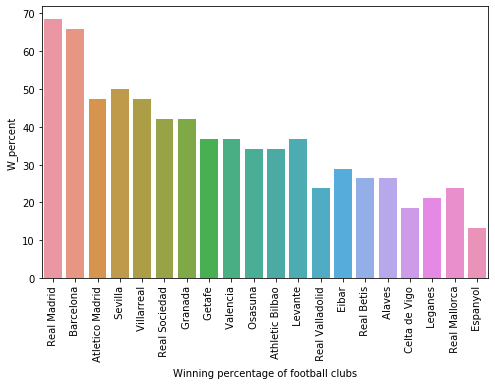

In [38]:
#plot a barchart showing winning percentage of football clubs
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data=laliga_df10, x=' Team', y='W_percent')
plt.xlabel('Winning percentage of football clubs')

Text(0.5, 0, 'Loss percentage of football clubs')

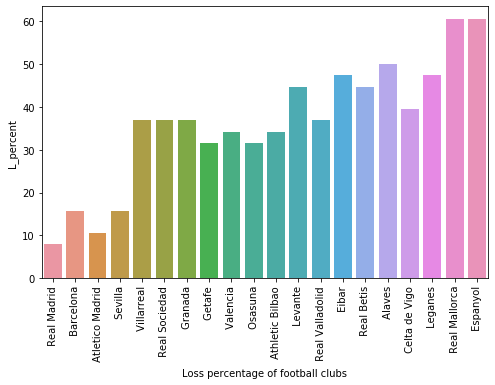

In [40]:
#plot a barchart showing loss percentage of football clubs
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data=laliga_df10, x=' Team', y='L_percent')
plt.xlabel('Loss percentage of football clubs')